## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [13]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [11]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 49us/step - loss: 6.0287 - acc: 0.2643 - val_loss: 5.8315 - val_acc: 0.3339
Epoch 2/50
50000/50000 [==============================] - 2s 43us/step - loss: 5.7411 - acc: 0.3567 - val_loss: 5.6546 - val_acc: 0.3768
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 5.5860 - acc: 0.3897 - val_loss: 5.5305 - val_acc: 0.3967
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 5.4610 - acc: 0.4110 - val_loss: 5.4052 - val_acc: 0.4137
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 5.3505 - acc: 0.4277 - val_loss: 5.3098 - val_acc: 0.4317
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 5.2502 - acc: 0.4408 - val_loss: 5.2081 - val_acc: 0.4409
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 5.1545 - acc: 0.4508 - val_loss: 5.1228 - val_acc

50000/50000 [==============================] - 2s 44us/step - loss: 1.8271 - acc: 0.3589 - val_loss: 1.7745 - val_acc: 0.3782
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7415 - acc: 0.3894 - val_loss: 1.7003 - val_acc: 0.4076
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6811 - acc: 0.4125 - val_loss: 1.6555 - val_acc: 0.4235
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6322 - acc: 0.4287 - val_loss: 1.6144 - val_acc: 0.4336
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5911 - acc: 0.4430 - val_loss: 1.5931 - val_acc: 0.4418
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5578 - acc: 0.4536 - val_loss: 1.5503 - val_acc: 0.4533
Epoch 8/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5292 - acc: 0.4644 - val_loss: 1.5278 - val_acc: 0.4595
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 44us/step - loss: 1.7157 - acc: 0.3989 - val_loss: 1.6908 - val_acc: 0.4112
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6579 - acc: 0.4186 - val_loss: 1.6397 - val_acc: 0.4218
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6116 - acc: 0.4382 - val_loss: 1.6152 - val_acc: 0.4344
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5720 - acc: 0.4499 - val_loss: 1.5779 - val_acc: 0.4449
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5378 - acc: 0.4617 - val_loss: 1.5536 - val_acc: 0.4541
Epoch 8/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5079 - acc: 0.4730 - val_loss: 1.5239 - val_acc: 0.4654
Epoch 9/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4827 - acc: 0.4797 - val_loss: 1.5288 - val_acc: 0.4629
Epoch 10/50
50000/50000 [===========================

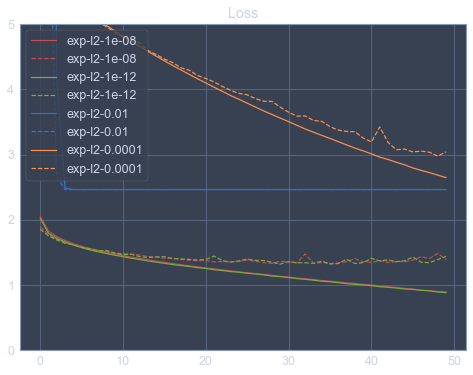

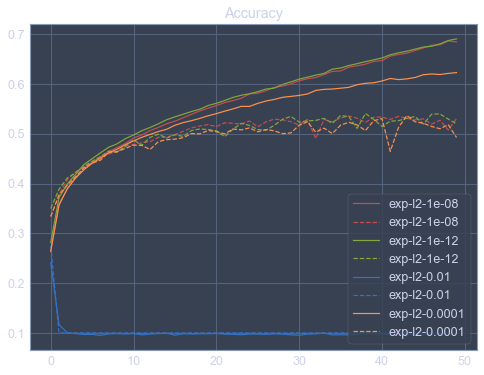

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()
fig.savefig("L1_loss.png", bbox_inches='tight', dpi=300)

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
fig.savefig("L1_acc.png", bbox_inches='tight', dpi=300)


In [17]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
l1_l2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [19]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in l1_l2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 54us/step - loss: 18.8341 - acc: 0.2660 - val_loss: 17.3818 - val_acc: 0.3413
Epoch 2/50
50000/50000 [==============================] - 2s 46us/step - loss: 16.1604 - acc: 0.3571 - val_loss: 14.9972 - val_acc: 0.3746
Epoch 3/50
50000/50000 [==============================] - 2s 47us/step - loss: 13.9733 - acc: 0.3798 - val_loss: 12.9909 - val_acc: 0.3868
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 12.1240 - acc: 0.3924 - val_loss: 11.2906 - val_acc: 0.3984
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 10.5511 - acc: 0.4027 - val_loss: 9.8549 - val_acc: 0.3964
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 9.2140 - acc: 0.4101 - val_loss: 8.6061 - val_acc: 0.4108
Epoch 7/50
50000/50000 [==============================] - 2s 46us/step - loss: 8.0727 - acc: 0.4146 - val_loss: 7.5542 

50000/50000 [==============================] - 2s 44us/step - loss: 13.0077 - acc: 0.3651 - val_loss: 12.1211 - val_acc: 0.3767
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 11.3387 - acc: 0.3867 - val_loss: 10.5928 - val_acc: 0.3913
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 9.9280 - acc: 0.4005 - val_loss: 9.2872 - val_acc: 0.4066
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 8.7275 - acc: 0.4108 - val_loss: 8.1851 - val_acc: 0.4183
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 7.7054 - acc: 0.4190 - val_loss: 7.2453 - val_acc: 0.4163
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 6.8332 - acc: 0.4254 - val_loss: 6.4425 - val_acc: 0.4217
Epoch 8/50
50000/50000 [==============================] - 2s 47us/step - loss: 6.0883 - acc: 0.4312 - val_loss: 5.7547 - val_acc: 0.4343
Epoch 9/50
50000/50000 [========================

50000/50000 [==============================] - 2s 44us/step - loss: 11.3422 - acc: 0.3805 - val_loss: 10.5991 - val_acc: 0.3835
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 9.9314 - acc: 0.3917 - val_loss: 9.2936 - val_acc: 0.3984
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 8.7309 - acc: 0.4034 - val_loss: 8.1875 - val_acc: 0.4043
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 7.7090 - acc: 0.4138 - val_loss: 7.2465 - val_acc: 0.4101
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 6.8363 - acc: 0.4196 - val_loss: 6.4423 - val_acc: 0.4181
Epoch 8/50
50000/50000 [==============================] - 2s 45us/step - loss: 6.0925 - acc: 0.4244 - val_loss: 5.7562 - val_acc: 0.4246
Epoch 9/50
50000/50000 [==============================] - 2s 44us/step - loss: 5.4559 - acc: 0.4299 - val_loss: 5.1786 - val_acc: 0.4317
Epoch 10/50
50000/50000 [=========================

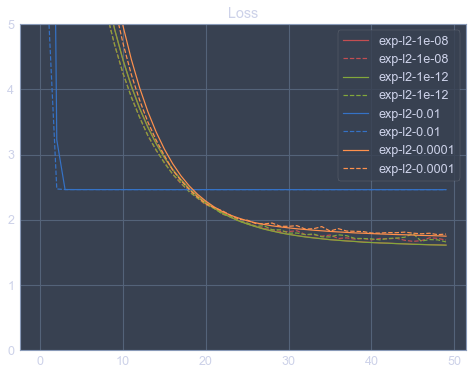

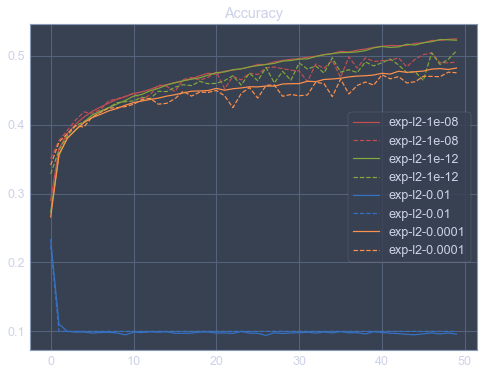

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()
fig.savefig("L1_L2_loss.png", bbox_inches='tight', dpi=300)

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
fig.savefig("L1_L2_acc.png", bbox_inches='tight', dpi=300)